# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three Observable trends based on the data:

1. There is a clear relationship between Max Temperature and Latitude. The data clearly displays an increasing Max Temp as you approach the Equator.

2. It surprised me that there is not a strong relationship between Humidity and Latitude. I expected Humidity to be similar to Max Temperature.

3. There is no significant relationship between Latitude and either Cloudiness or Wind Speed. I initially thought that Wind Speed seemed to increase at the poles and the Equator, but the regression does not shop a relationship.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Save base URL for API calls set units to Imperial for correct data ranges
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#empty city weather list
city_weather = []

#loop through each city creating dictionary using API calls
for city in cities:
    
    response = requests.get(url + "appid=" + weather_api_key + "&q=" + city).json()

    response
    
    try:
        
        weather_dict = {"City": response['name'],
                        "Lat": response['coord']['lat'],
                        "Lng": response['coord']['lon'],
                        "Max Temp": response['main']['temp_max'],
                        "Humidity": response['main']['humidity'],
                        "Cloudiness": response['clouds']['all'],
                        "Wind Speed": response['wind']['speed'],
                        "Country": response['sys']['country'],
                        "Date": response['dt']
                        }
                        
    
        city_weather.append(weather_dict)

        #print log of cities found                                         
        print (f"City Name: {response['name']} / ID:{response['id']}")

    except:
        
        #print report of missing data
        print("Missing city...skipping | " + city)
   

City Name: Ushuaia / ID:3833367
City Name: Bluff / ID:2206939
City Name: Marzuq / ID:72181
Missing city...skipping | bababe
City Name: Hobart / ID:2163355
City Name: Provideniya / ID:4031574
City Name: Chokurdakh / ID:2126123
City Name: New Ulm / ID:5039173
City Name: São Filipe / ID:3374210
Missing city...skipping | toliary
City Name: Tuktoyaktuk / ID:6170031
City Name: Soteapan / ID:3516526
City Name: Santa Inês / ID:3389609
Missing city...skipping | attawapiskat
City Name: Pisco / ID:3932145
City Name: Baie-Comeau / ID:5889745
City Name: Hambantota / ID:1244926
City Name: Tolcsva / ID:714642
City Name: Albany / ID:5106841
City Name: Ciudad Guayana / ID:3645528
City Name: Ordu / ID:741098
City Name: Nicolás Bravo / ID:3522742
City Name: Touros / ID:3386213
City Name: Madoc / ID:6063989
City Name: Doha / ID:290030
City Name: Mossamedes / ID:3347019
City Name: Aykhal / ID:2027296
City Name: Gravdal / ID:3155152
City Name: Jamestown / ID:5122534
City Name: Dunedin / ID:2191562
City Name

City Name: Srednekolymsk / ID:2121025
City Name: Khairpur Nathan Shah / ID:1174344
City Name: Padang / ID:1633419
City Name: São Gabriel da Cachoeira / ID:3662342
City Name: Saint Paul Harbor / ID:5866583
City Name: Gunjur / ID:2413419
City Name: Kollam / ID:1259091
City Name: Ilulissat / ID:3423146
City Name: Codrington / ID:2171099
City Name: Lompoc / ID:5367788
City Name: Poplar Bluff / ID:4404233
City Name: Baykit / ID:1510689
City Name: Vagay / ID:1487860
City Name: Kamenka / ID:553766
Missing city...skipping | nizhneyansk
City Name: Coolum Beach / ID:2170581
City Name: Ulagan / ID:1488048
City Name: Ostrovnoy / ID:556268
City Name: Laguna / ID:5364271
City Name: North Bend / ID:5742974
City Name: Bilibino / ID:2126682
City Name: Rio Grande / ID:3451138
City Name: Chui / ID:3443061
City Name: Oranjemund / ID:3354071
City Name: Thompson / ID:6165406
City Name: Genhe / ID:2037252
City Name: Krabi / ID:1152633
Missing city...skipping | longlac
City Name: Bow Island / ID:5906757
City 

City Name: Marystown / ID:6067472
City Name: Jacareacanga / ID:3397763
City Name: Ampanihy / ID:1078553
City Name: Iquitos / ID:3696183
City Name: Impfondo / ID:2259655
City Name: Pingliang / ID:1798760
City Name: Savannah Bight / ID:3601402
City Name: Swan Hill / ID:2147756
City Name: Farafangana / ID:1065158
City Name: Kalmunai / ID:1242110
City Name: Alice Springs / ID:2077895
City Name: Delta del Tigre / ID:3442778
City Name: Vraca / ID:3191281
City Name: Elko / ID:5703673
City Name: Borovoy / ID:1508894
Missing city...skipping | rungata
City Name: Karagaylinskiy / ID:1504590
City Name: Gorom-Gorom / ID:2360372
City Name: Ures / ID:3980782
City Name: Ubari / ID:2219235
City Name: Hay River / ID:5972762
City Name: Coromandel / ID:3465487
City Name: Mahina / ID:4034307
City Name: Talara / ID:3691582
City Name: Oriximiná / ID:3393471
City Name: Karratha / ID:6620339
City Name: Antipino / ID:1511538
City Name: Winneba / ID:2294034
Missing city...skipping | marcona
Missing city...skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create city weather dataframe and export to a .csv file
city_weather_df = pd.DataFrame(city_weather)

city_weather_df.to_csv(r'../cities.csv', index=False, header=True)

city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,33.80,89,0,4.70,AR,1594925177
1,Bluff,-46.60,168.33,38.19,88,50,10.92,NZ,1594925348
2,Marzuq,14.40,46.47,85.55,47,88,3.67,YE,1594925413
3,Hobart,-42.88,147.33,39.99,86,1,4.27,AU,1594925412
4,Provideniya,64.38,-173.30,53.22,75,81,2.19,RU,1594925413
...,...,...,...,...,...,...,...,...,...
585,Sarakhs,36.54,61.16,87.49,24,0,16.55,IR,1594925478
586,Mozhaysk,55.50,36.03,55.09,96,99,6.02,RU,1594925478
587,Jilib,0.49,42.79,73.54,76,100,6.78,SO,1594925478
588,Coahuayana Viejo,18.73,-103.68,71.60,78,90,23.04,MX,1594925424


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
# Set length of cities with humidity over 100 to a variable
# .loc finds any rows with Humidity over 100 and returns the length of rows it finds
x = len(city_weather_df.loc[city_weather_df['Humidity'] > 100])

print(x)

#If there are cities with Humidity greater than 100 create new dataframe without those rows
if x > 0:
    
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    clean_city_df = city_weather_df[city_weather_df['Humitidy'] > 100]
    
    clean_city_df = clean_city_df.reset_index(drop=True)
    
    # Export the City_Data into a csv
    clean_city_df.to_csv(r'../cities.csv', index=False, header=True)

0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

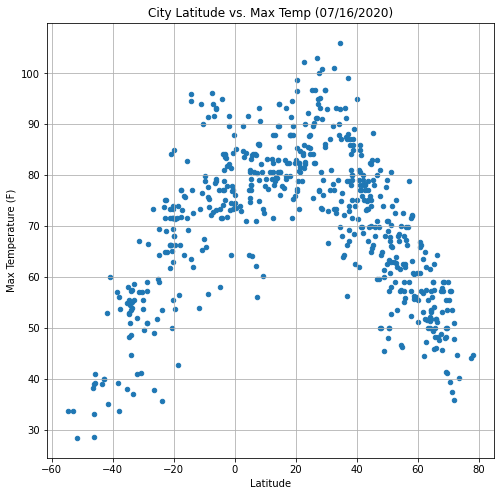

In [7]:
# Create a scatter plot which compares latitude and max temperature
current_time = datetime.now()
date = current_time.strftime('%m/%d/%Y')
title_with_date = f'City Latitude vs. Max Temp ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('maxtemp_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()


Observation: The max temperature definitely increases as you approach the Equator.

## Latitude vs. Humidity Plot

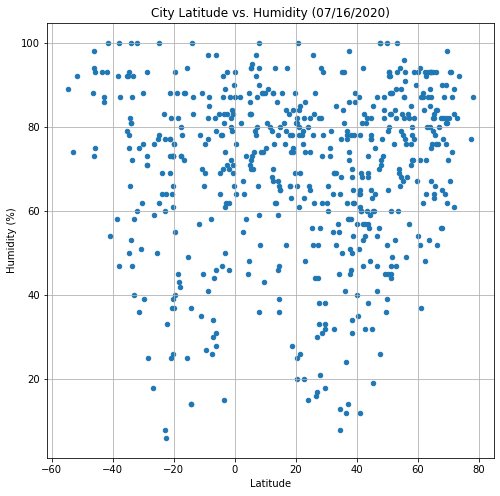

In [8]:
#create a scatter plot which compares Latitude and Humidity
title_with_date = f'City Latitude vs. Humidity ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('humidity_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()

Observation: There does not seem to be a strong relationship between Latitude and Windspeed, although wind speed seems to be highter in general at the poles and right at the Equator.

## Latitude vs. Cloudiness Plot

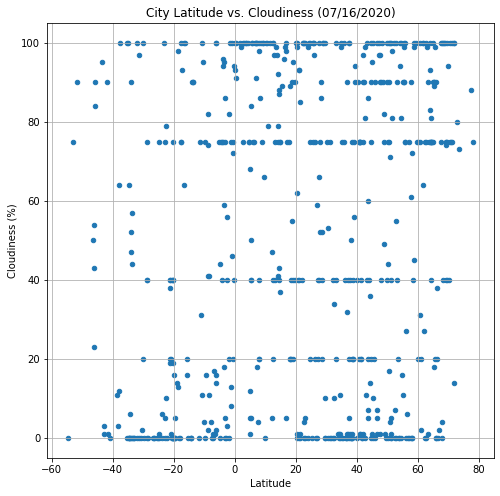

In [9]:
#create a scatter plot which compares Latitude and Cloudiness
title_with_date = f'City Latitude vs. Cloudiness ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('cloudiness_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()

Observation: the points seem evenly scattered I don't see a relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

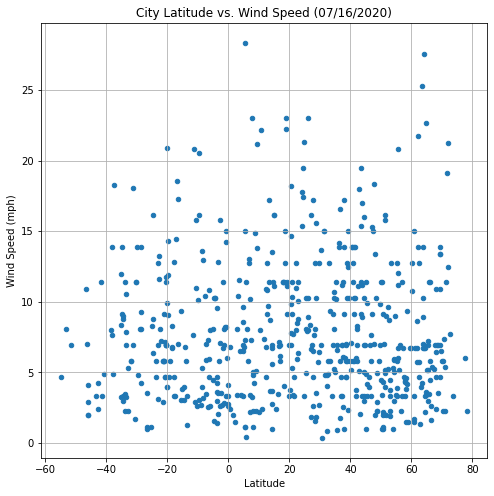

In [10]:
#create a scatter plot which compares Latitude and Wind Speed
title_with_date = f'City Latitude vs. Wind Speed ({date})'

city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
                  title= title_with_date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('windspeed_vs_lat.png', dpi=300, bbox_inches = 'tight')
plt.show()

Observation: The Northern Hemisphere seems to have higher winds in general than the Southern Hemisphere. It could have to do with seasons?

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
#Regimen Quartile, Outlier, Boxplot function
def linear_regression(x_values, y_values, x_label, y_label, line_x, line_y):

    
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_x, line_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

        
    




In [12]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere Dataframe
northern_hemisphere_df = city_weather_df.loc[city_weather_df['Lat'] > 0]
#print(northern_hemisphere_df)

southern_hemisphere_df = city_weather_df.loc[city_weather_df['Lat'] < 0]
#print(southern_hemisphere_df)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.525894637418989


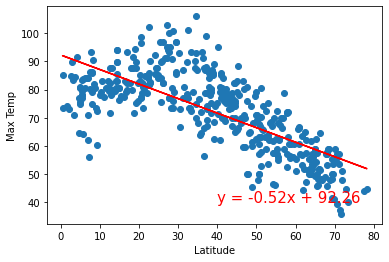

In [13]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'],northern_hemisphere_df['Max Temp'], 'Latitude', 'Max Temp', 40, 40)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6655831977420379


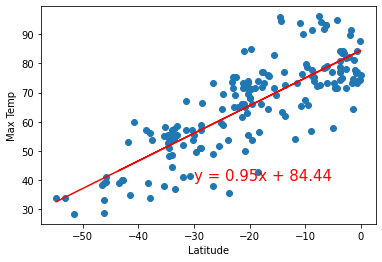

In [14]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'],southern_hemisphere_df['Max Temp'], 'Latitude', 'Max Temp', -30, 40)

Observation on these 2 regressions: There is a strong relationship between Max Temp and Latitude in both the Northern and Southern Hemispheres. Both r values are above .5 + and -.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015992972394818103


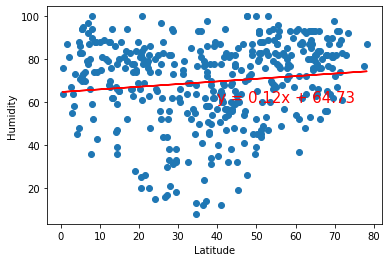

In [15]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], 'Latitude', 'Humidity', 40, 60)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022499226296584705


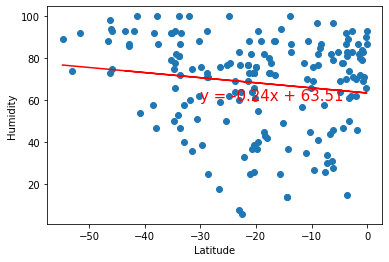

In [16]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], 'Latitude', 'Humidity', -30, 60)

Observation on these 2 regressions: There is a very minimal relationship between Latitude and Humidity in both Hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0018433219444555756


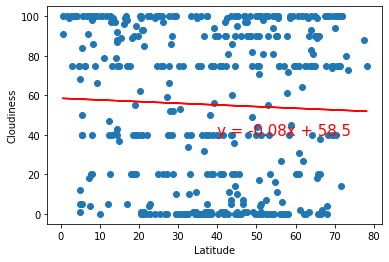

In [17]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'],northern_hemisphere_df['Cloudiness'], 'Latitude', 'Cloudiness', 40, 40)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01255924489593629


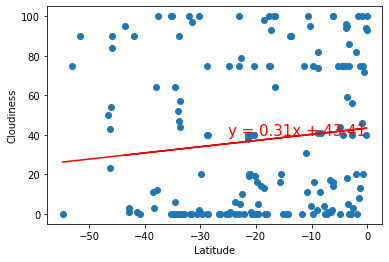

In [18]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'],southern_hemisphere_df['Cloudiness'], 'Latitude', 'Cloudiness', -25, 40)

Observation on these 2 regressions: There is not a significant relationship between Latitude and Cloudiness in either hemisphere, but by and even bigger degree in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00798921283004617


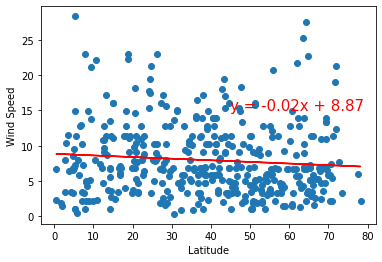

In [19]:
#call function to perform linear regression on the data
linear_regression(northern_hemisphere_df['Lat'],northern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed', 45, 15)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 5.617616017128229e-05


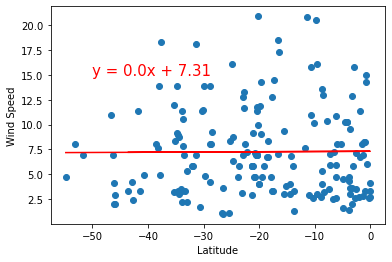

In [20]:
#call function to perform linear regression on the data
linear_regression(southern_hemisphere_df['Lat'],southern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed', -50, 15)

Observation on these 2 regressions: There is a very minimal relationship between Latitude and Wind Speed in both Hemispheres.